# K-meansでクラスタリング

(150, 4)


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

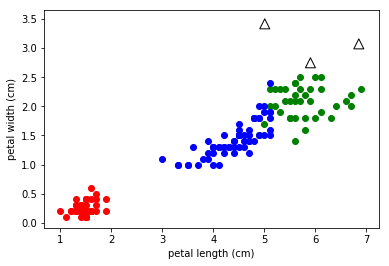

In [68]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets

# iris データセットをロード
iris = datasets.load_iris()
data = iris['data']
# k-means モデルの作成
# クラスタ数は 3 を指定
model = cluster.KMeans(n_clusters=3)
model.fit(data)

# クラスタリング結果の取得
labels = model.labels_
centroids = model.cluster_centers_

# 以降、結果の描画
# 1 番目のキャンバスを作成
plt.figure(1)
print(data.shape)
# ラベル 0 の描画
ldata = data[labels == 0]
plt.scatter(ldata[:, 2], ldata[:, 3], color='green')
# ラベル 1 の描画
ldata = data[labels == 1]
plt.scatter(ldata[:, 2], ldata[:, 3], color='red')
# ラベル 2 の描画
ldata = data[labels == 2]
plt.scatter(ldata[:, 2], ldata[:, 3], color='blue')

# セントロイドの描画
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, marker='^', facecolors='none', edgecolors='black')

# x軸、y軸の設定
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])

data[labels==1]


# TSNEで次元削除

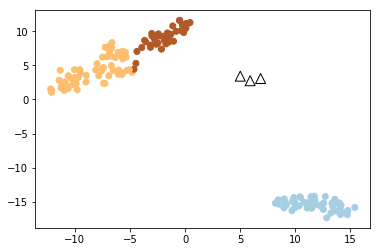

In [58]:
tsne = TSNE(n_components=2, random_state=1, perplexity=30).fit_transform(data)

plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='Paired')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, marker='^', facecolors='none', edgecolors='black')

## データとセントロイドを同時に次元削除

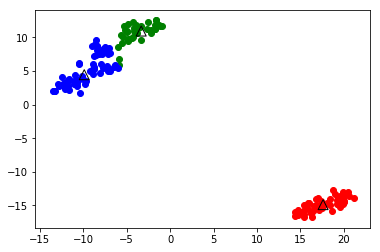

In [83]:
import numpy as np

temp_data = np.vstack((data, centroids))
tsne = TSNE(n_components=2, random_state=1, perplexity=30).fit_transform(temp_data)

tsne, temp_centroids = np.vsplit(tsne, [-centroids.shape[0]])


#plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='Paired')
#plt.scatter(tsne[:, 0], tsne[:, 1], c=labels)

# ラベル 0 の描画
ldata = tsne[labels == 0]
plt.scatter(ldata[:, 0], ldata[:, 1], color='green')
# ラベル 1 の描画
ldata = tsne[labels == 1]
plt.scatter(ldata[:, 0], ldata[:, 1], color='red')
# ラベル 2 の描画
ldata = tsne[labels == 2]
plt.scatter(ldata[:, 0], ldata[:, 1], color='blue')


plt.scatter(temp_centroids[:, 0], temp_centroids[:, 1], s=100, marker='^', facecolors='none', edgecolors='black')

## データとセントロイドを別々に次元削除

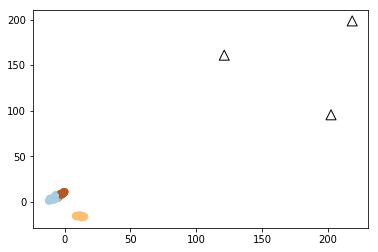

In [65]:
tsne = TSNE(n_components=2, random_state=1, perplexity=30).fit_transform(data)
temp_centroids = TSNE(n_components=2, random_state=1, perplexity=30).fit_transform(centroids)

plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, cmap='Paired')

plt.scatter(temp_centroids[:, 0], temp_centroids[:, 1], s=100, marker='^', facecolors='none', edgecolors='black')

In [78]:
a = np.arange(12).reshape((3, 4))
print(a)
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

b = np.arange(12,24).reshape((3, 4))
print(np.sort(b, axis=1))
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]



print(a[b < 5][:,2])
# [0 1 2 3 4]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


IndexError: too many indices for array